X.shape:  (1447, 120, 160, 3)
Y.shape:  (1447,)
Min Steering Angle:-47
Max Steering Angle:38


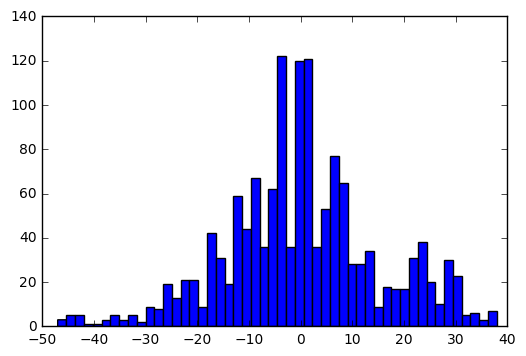

In [2]:
import numpy as np
from PIL import Image, ImageEnhance, ImageOps
import pandas as pd
import pickle

import matplotlib.pyplot as plt
%matplotlib inline

file_path='/home/alans/donkey_data/sessions/warehouseRGB.pkl'
with open(file_path, 'rb') as f:
    X, Y = pickle.load(f)
    
print('X.shape: ', X.shape)
print('Y.shape: ', Y.shape)
#imshow(X[0])
#print(Y[0])



plt.hist(Y, bins=50)
print("Min Steering Angle:" + str(min(Y)))
print("Max Steering Angle:" + str(max(Y)))

22448
11491
Min Steering Angle:-0.977777777778
Max Steering Angle:0.977777777778


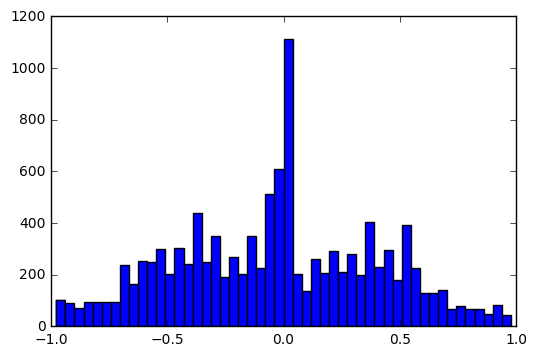

In [3]:
import numpy as np
from PIL import Image, ImageEnhance, ImageOps
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import pickle
import data
import cv2


xs,Y = data.loadTraining()
plt.hist(Y, bins=50)
print("Min Steering Angle:" + str(min(Y)))
print("Max Steering Angle:" + str(max(Y)))

7062
5520
Min Steering Angle:-90
Max Steering Angle:90


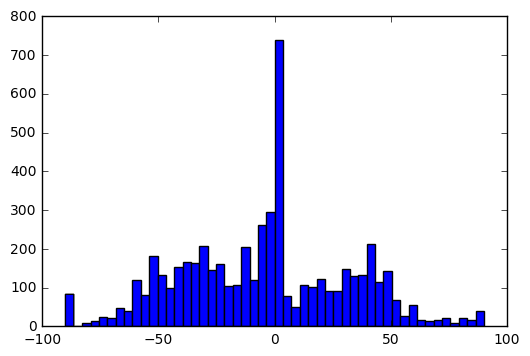

In [4]:
import os
def getFiles(name):
    files = os.listdir(name)
    files = [f for f in files if f[-3:] =='jpg']
    files.sort()
    file_paths = [os.path.join(name, f) for f in files]
    return file_paths

def parse_img_filepath(filepath):
        f = filepath.split('/')[-1]
        f = f.split('.')[0]
        f = f.split('_')

        throttle = int(f[3])
        angle = int(f[5])
        milliseconds = int(f[7])

        data = {'name':filepath,'throttle':throttle, 'angle':angle, 'milliseconds': milliseconds}
        return data

    
def parse_img_filepaths(filepaths):
    result = [parse_img_filepath(f) for f in filepaths]
    return result
fp1=getFiles("/home/alans/donkey_data/sessions/2017_02_15__07_02_07_PM")
fp2=getFiles("/home/alans/donkey_data/sessions/2017_02_15__07_24_32_PM")
fp=getFiles("/home/alans/donkey_data/sessions/2017_02_17__08_08_30_AM")
#fp=fp1+fp2
print(len(fp))
r=parse_img_filepaths(fp)
#print(r)

xs=[]
ys=[]
i=0
remove=0
for entry in r:
    if (entry['throttle'] >=5 ):
        i=i+1
        if (abs(float(entry['angle'])) < 2):
            remove=remove+1
            if (remove==3):
                remove=0
                xs.append(entry['name'])
                ys.append(entry['angle'])
        else:
            xs.append(entry['name'])
            ys.append(entry['angle'])

print(len(xs))
plt.hist(ys, bins=50)
print("Min Steering Angle:" + str(min(ys)))
print("Max Steering Angle:" + str(max(ys)))


In [4]:
# center, left, right, steering angle, throttle, break, speed

# preprocess the data

X_full_name = []
y_full_angle= []

line = csv_array.iloc[0]
  #print(line)

    
def plotCameraImages(line):
  fig, axes = plt.subplots(1, 3)
  fig.set_figwidth(10)
  fig.set_figheight(20)

  i=0
  for camera in ['left','center','right']:
    #print(i)
    axes.flat[i].imshow(Image.open(path+'/'+line[camera].decode('UTF-8').strip()))
    axes.flat[i].tick_params(labelcolor='w', top='off', bottom='off', left='off', right='off')
    if (camera=='center'):
       axes.flat[i].set_title(camera+' ' +str(line['steering']))
    else:
       axes.flat[i].set_title(camera)
        
    i=i+1
    
plotCameraImages(csv_array.iloc[0])
plotCameraImages(csv_array.iloc[1900])
plotCameraImages(csv_array[csv_array.steering < 0.26 ][csv_array.steering>0.24].iloc[4])
    


NameError: name 'csv_array' is not defined

In [ ]:
csv_array.head()

Load our data and plot out some images to see how they are transformed, make sure code works correctly

    Test: 
      loadTraining  
      processImage

22448
11491
0.544444444444
(120, 160, 3)
(66, 200, 3)
(120, 160, 3)


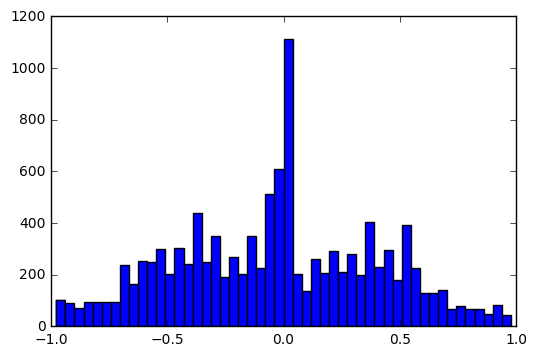

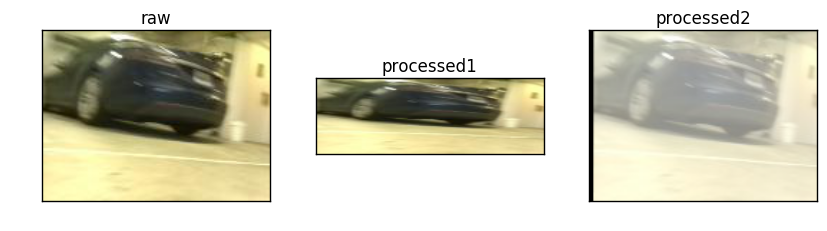

-0.0222222222222
(120, 160, 3)
(66, 200, 3)
(120, 160, 3)


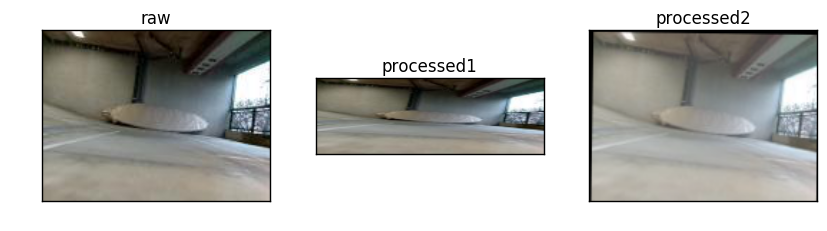

-0.788888888889
(120, 160, 3)
(66, 200, 3)
(120, 160, 3)


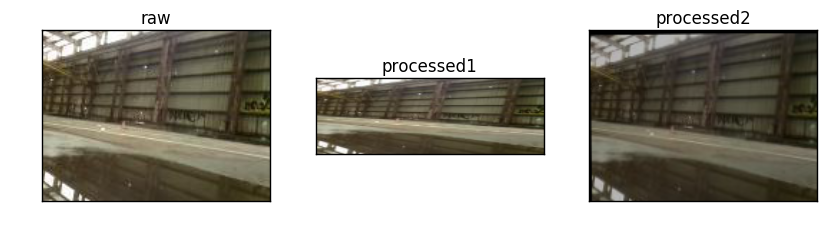

0.288888888889
(120, 160, 3)
(66, 200, 3)
(120, 160, 3)


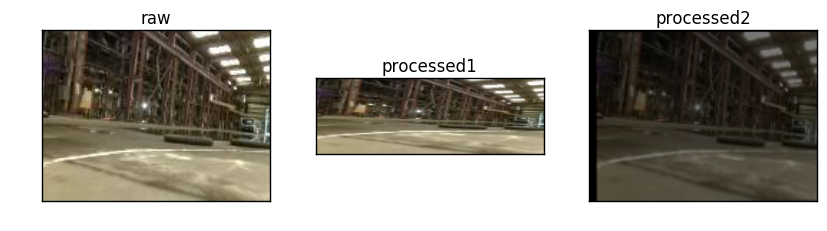

In [7]:
import data
import cv2
import matplotlib.pyplot as plt
%matplotlib inline



xs,ys = data.loadTraining()
plt.hist(ys, bins=50)

def displayRowOfImages(filename):
    img=[]
    image = filename
    #img.append( np.array(Image.open(filename)))
    #image = cv2.cvtColor(filename,cv2.COLOR_BGR2RGB)
    #gray = cv2.cvtColor(filename,cv2.COLOR_BGR2GRAY)
    #red, green, blue = filename.T 
    #print(red.shape)
    #image = np.array([blue, green, red])
#    image = np.roll(filename, 1, axis=-1)
#    image = np.roll(image, 1, axis=-1)
#    image = np.roll(image, 1, axis=-1)
    
    img.append(image)
    img.append( cv2.resize(image, (200, 66) ))
    img.append( data.processImage(image) )


    fig, axes = plt.subplots(1, 3)
    fig.set_figwidth(10)
    fig.set_figheight(20)

    i=0
    for camera in ['raw','processed1','processed2']:
        print(img[i].shape)
        axes.flat[i].imshow(img[i])
        axes.flat[i].tick_params(labelcolor='w', top='off', bottom='off', left='off', right='off')
        axes.flat[i].set_title(camera)
        i=i+1
    plt.show()
    
print(ys[0])
displayRowOfImages(xs[0])
print(ys[2000])
displayRowOfImages(xs[2000])
print(ys[4000])
displayRowOfImages(xs[4000])
print(ys[6000])
displayRowOfImages(xs[6000])


    Test 
       augment_brightness_camera_images

original


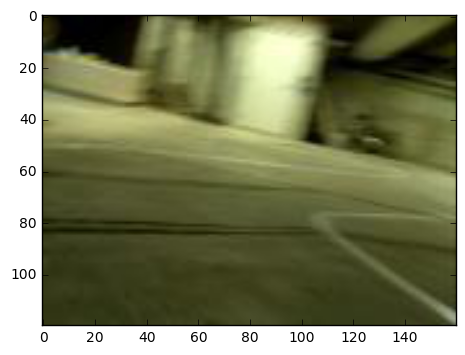

brightness


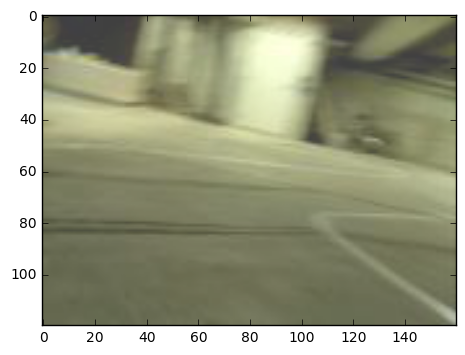

brightness


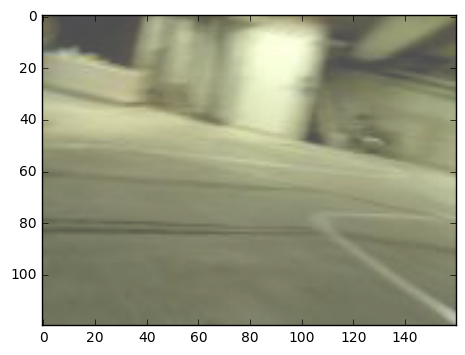

In [6]:
print('original')
filename=xs[0]
img3 = np.array(filename)
plt.imshow(img3)
plt.show()
print('brightness')
filename=xs[0]
img3 = np.array(filename)
img3 = data.augment_brightness_camera_images(img3)
plt.imshow(img3)
plt.show()
print('brightness')
img3 = np.array(filename)
img3 = data.augment_brightness_camera_images(img3)
plt.imshow(img3)
plt.show()

    Test
             cropImage

In [ ]:
print('original')
filename=xs[0]
img3 = np.array(Image.open(filename))
plt.imshow(img3)
plt.show()
print('crop')
filename=xs[0]
img3 = np.array(Image.open(filename))
img3 = data.cropImage(img3)
plt.imshow(img3)
plt.show()

    test
        rotateAndScaleImage

In [ ]:
print('original')
filename=xs[0]
img3 = np.array(Image.open(filename))
plt.imshow(img3)
plt.show()
print('rotateAndScale')
filename=xs[0]
img3 = np.array(Image.open(filename))
img3 = data.rotateAndScaleImage(img3)
plt.imshow(img3)
plt.show()

     test
            translateImage

In [ ]:
print('original')
filename=xs[0]
img3 = np.array(Image.open(filename))
plt.imshow(img3)
plt.show()
print('translateImage')
filename=xs[0]
img3 = np.array(Image.open(filename))
img3 = data.translateImage(img3)
plt.imshow(img3)
plt.show()

In [ ]:
print("original distribution")
plt.hist(csv_array.steering, bins=50)
plt.show()
print("new distribution")
out=plt.hist(ys, bins=50)
plt.show()
print("overlay")
bins = 50
plt.hist(csv_array.steering, bins, alpha=0.5, label='before')
plt.hist(ys, bins, alpha=0.5, label='after')
plt.legend(loc='upper right')
plt.show()

{'val_loss': [0.15155737703368508, 0.083102175990152641, 0.056607686194795122, 0.045503785258390494, 0.041556459903364353, 0.036837462296147316, 0.038214682840560316, 0.035127679889018722, 0.031354212637483718, 0.032526916662264149, 0.031830411351467733, 0.031085156711071905, 0.032015707440806562, 0.031941996307591716, 0.03180332925809911, 0.032350567040535121, 0.031641596229471401, 0.031634521550504412, 0.030257869335497626, 0.028427714744263147], 'loss': [0.1770012505352497, 0.12483193814754485, 0.074231083542108542, 0.05496538933366537, 0.046034316718578341, 0.038692424688488242, 0.0349270836263895, 0.034049576465040449, 0.030311677604913712, 0.029297246783971786, 0.026533480249345303, 0.026146524976938965, 0.025604416374117134, 0.024967801813036202, 0.024581432249397038, 0.02466906303539872, 0.025137600172311068, 0.024082732647657396, 0.022252627667039632, 0.021385241830721498]}


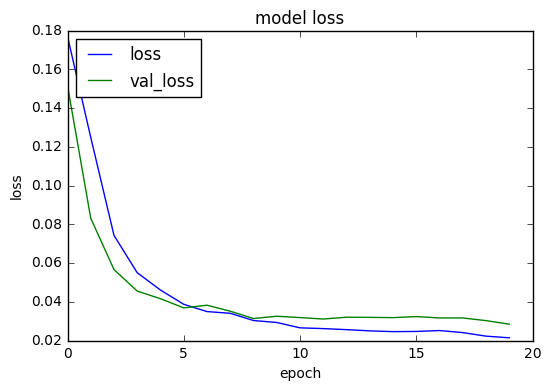

In [3]:
import pickle

history = pickle.load(open("history.p","rb"))
print(history)
#http://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/
# summarize history for loss
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc='upper left')
plt.show()
